In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
class CFG:
    TRAIN_PATH = "train.csv"
    TEST_PATH = "test.csv"
    TRANSACTION_HEADER_PATH = "transaction_header.csv" # Fiş bilgileri
    TRANSACTION_SALE_PATH = "transaction_sale.csv"     # Fişlerin içerisindeki ürünlerin bilgileri
    PRODUCT_GROUPS_PATH = "product_groups.csv"         # Kampanya kategorilerinin denk geldiği kategori kırılımları
    CUSTOMER_ACCOUNT_PATH = "customeraccount.csv"      # cardnumber-individualnumber eşleşmesi
    CUSTOMER_PATH = "customer.csv"                     # Müşterilerin demografik bilgileri
    GENEL_KATEGORI_PATH = "genel_kategoriler.csv"      # Genel kategori isimleri

In [3]:
train = pd.read_csv(CFG.TRAIN_PATH)
test = pd.read_csv(CFG.TEST_PATH)
transaction_header = pd.read_csv(CFG.TRANSACTION_HEADER_PATH)
transaction_sale = pd.read_csv(CFG.TRANSACTION_SALE_PATH)
product_groups = pd.read_csv(CFG.PRODUCT_GROUPS_PATH)
customeraccount = pd.read_csv(CFG.CUSTOMER_ACCOUNT_PATH)
customer = pd.read_csv(CFG.CUSTOMER_PATH)
genel_kategoriler = pd.read_csv(CFG.GENEL_KATEGORI_PATH)

In [4]:
df=train.merge(customer[['individualnumber', 'dateofbirth','gender']],how='left',on='individualnumber')
test_df=test.merge(customer[['individualnumber', 'dateofbirth','gender']],how='left',on='individualnumber')

In [5]:
category=product_groups.merge(genel_kategoriler,on="category_number",how='left')
transaction=transaction_sale.merge(category,how='left',on=["category_level_1","category_level_2","category_level_3","category_level_4"]).drop(columns='category_number')
#transaction=transaction_sale[["basketid","amount","quantity","discount_type_1","discount_type_2","discount_type_3"]]
#transaction=transaction_header.merge(transaction_sale,on='basketid',how='left')
transaction

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3,genel_kategori
0,20120706070177471,613,50,50,15,19.90,2.0,NaN,0.0,0.00,NaN
1,20120706070177471,425,30,12,10,3.50,1.0,NaN,0.0,0.00,diger
2,20120706070177471,425,30,12,11,7.90,1.0,NaN,0.0,0.00,diger
3,20122703940031323,103,25,15,10,7.90,2.0,NaN,0.0,0.00,icecek
4,20122703940031323,101,15,15,15,16.00,1.0,NaN,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6693724,20120839080026509,103,35,10,10,2.95,1.0,NaN,0.0,0.00,icecek
6693725,20120839080026509,130,85,11,10,3.40,1.0,NaN,0.0,0.00,gida
6693726,20120839080026509,131,10,10,20,4.45,1.0,NaN,0.0,0.00,gida
6693727,21101831040099839,103,35,10,10,0.01,1.0,NaN,0.0,1.24,icecek


In [6]:
transaction=customeraccount.merge(transaction,on='cardnumber')
transaction

,individualnumber,cardnumber,date_of_transaction,basketid,is_sanal,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,16481068,7287134635560315,2020-12-20,20122010940085835,0,310.0,30.0,15.0,15.0,11.90,2.0,NaN,0.0,0.00
1,16481068,7287134635560315,2020-12-20,20122010940085835,0,312.0,15.0,15.0,20.0,9.95,1.0,NaN,0.0,0.00
2,16481068,7287134635560315,2020-12-20,20122010940085835,0,311.0,10.0,20.0,15.0,59.90,2.0,NaN,0.0,0.00
3,16481068,7287134635560315,2020-12-20,20122010940085835,0,110.0,35.0,25.0,15.0,4.30,1.0,NaN,0.0,0.00
4,16481068,7287134635560315,2020-12-20,20122010940085835,0,103.0,30.0,15.0,10.0,4.75,1.0,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538222,102040641,1587464609566715,2021-10-19,21101967030019696,0,654.0,65.0,15.0,10.0,18.95,1.0,NaN,0.0,0.00
6538223,102040641,1587464609566715,2021-11-13,21111367030018788,0,103.0,25.0,35.0,10.0,30.45,1.0,NaN,0.0,0.00
6538224,102040641,1587464609566715,2021-11-13,21111367030018788,0,617.0,15.0,15.0,65.0,6.00,1.0,NaN,0.0,0.00
6538225,102040641,1587464609566715,2021-11-13,21111367030018788,0,130.0,85.0,11.0,12.0,8.17,1.0,NaN,0.0,0.08


In [7]:
temp=transaction.groupby('individualnumber').agg({'basketid':'count','is_sanal':'sum',
                                                  'amount':'sum','quantity':'sum','date_of_transaction':'count'}).reset_index()
temp

,individualnumber,basketid,is_sanal,amount,quantity,date_of_transaction
0,30690,351,0,7073.07,894.763,351
1,294867,139,14,7775.32,353.475,139
2,322878,342,71,13069.41,783.166,342
3,356411,423,145,7131.68,656.847,423
4,374368,443,136,8659.40,789.763,443
...,...,...,...,...,...,...
28571,102278919,9,0,147.64,14.000,9
28572,102279267,10,10,97.30,10.000,10
28573,102280492,7,0,73.35,7.000,7
28574,102280832,4,0,54.35,6.000,4


In [8]:
temp.insert(loc=6,
          column='price',
          value=temp["amount"]/temp["quantity"])
temp.drop("amount", axis=1,inplace=True)
temp.drop("quantity", axis=1,inplace=True)
temp

,individualnumber,basketid,is_sanal,date_of_transaction,price
0,30690,351,0,351,7.904965
1,294867,139,14,139,21.996803
2,322878,342,71,342,16.687918
3,356411,423,145,423,10.857445
4,374368,443,136,443,10.964555
...,...,...,...,...,...
28571,102278919,9,0,9,10.545714
28572,102279267,10,10,10,9.730000
28573,102280492,7,0,7,10.478571
28574,102280832,4,0,4,9.058333


In [9]:
df = df.merge(temp,on='individualnumber',how='left')
df

,individualnumber,category_number,hakkedis_amt,odul_amt,response,dateofbirth,gender,basketid,is_sanal,date_of_transaction,price
0,94230288,9000,21.0,2.0,0,1983.0,E,393.0,27.0,393.0,13.251436
1,4684087,9000,17.0,1.0,0,1951.0,E,138.0,0.0,138.0,35.675011
2,92472145,9058,24.0,3.0,0,1982.0,K,1709.0,158.0,1709.0,10.405681
3,88026681,9030,22.0,2.0,0,1961.0,K,287.0,274.0,287.0,16.977563
4,98127795,9001,38.0,3.0,0,1984.0,E,24.0,0.0,24.0,5.513806
...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,1997.0,K,893.0,27.0,893.0,5.723929
13111,96841665,9004,65.0,6.0,0,1971.0,E,271.0,0.0,271.0,18.892224
13112,98445787,9044,33.0,3.0,0,1975.0,K,142.0,0.0,142.0,11.324826
13113,13781030,9004,66.0,6.0,0,1981.0,E,53.0,7.0,53.0,9.920747


In [10]:
df.insert(loc=11,
          column='age',
          value=2022-df["dateofbirth"])

In [11]:
df.drop("dateofbirth", axis=1,inplace=True)
df.drop("date_of_transaction", axis=1,inplace=True)
df

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,basketid,is_sanal,price,age
0,94230288,9000,21.0,2.0,0,E,393.0,27.0,13.251436,39.0
1,4684087,9000,17.0,1.0,0,E,138.0,0.0,35.675011,71.0
2,92472145,9058,24.0,3.0,0,K,1709.0,158.0,10.405681,40.0
3,88026681,9030,22.0,2.0,0,K,287.0,274.0,16.977563,61.0
4,98127795,9001,38.0,3.0,0,E,24.0,0.0,5.513806,38.0
...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,K,893.0,27.0,5.723929,25.0
13111,96841665,9004,65.0,6.0,0,E,271.0,0.0,18.892224,51.0
13112,98445787,9044,33.0,3.0,0,K,142.0,0.0,11.324826,47.0
13113,13781030,9004,66.0,6.0,0,E,53.0,7.0,9.920747,41.0


In [12]:
(df.age<18).sum()

3

In [13]:
df.drop(df.loc[df['age']<18].index, inplace=True)
df

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,basketid,is_sanal,price,age
0,94230288,9000,21.0,2.0,0,E,393.0,27.0,13.251436,39.0
1,4684087,9000,17.0,1.0,0,E,138.0,0.0,35.675011,71.0
2,92472145,9058,24.0,3.0,0,K,1709.0,158.0,10.405681,40.0
3,88026681,9030,22.0,2.0,0,K,287.0,274.0,16.977563,61.0
4,98127795,9001,38.0,3.0,0,E,24.0,0.0,5.513806,38.0
...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,K,893.0,27.0,5.723929,25.0
13111,96841665,9004,65.0,6.0,0,E,271.0,0.0,18.892224,51.0
13112,98445787,9044,33.0,3.0,0,K,142.0,0.0,11.324826,47.0
13113,13781030,9004,66.0,6.0,0,E,53.0,7.0,9.920747,41.0


In [14]:
test_df = test_df.merge(temp,on='individualnumber',how='left')
test_df

,individualnumber,category_number,hakkedis_amt,odul_amt,dateofbirth,gender,basketid,is_sanal,date_of_transaction,price
0,95812936,9029,38.0,3.0,1995.0,E,28.0,0.0,28.0,34.785714
1,23929570,9012,28.0,2.0,1974.0,E,45.0,0.0,45.0,15.265885
2,95948115,9019,21.0,2.0,1967.0,E,22.0,0.0,22.0,20.526597
3,100898513,9035,48.0,4.0,1978.0,K,257.0,0.0,257.0,11.938417
4,12769156,9015,26.0,3.0,1970.0,K,1574.0,261.0,1574.0,8.470822
...,...,...,...,...,...,...,...,...,...,...
13231,93418529,9049,32.0,3.0,1979.0,E,248.0,0.0,248.0,9.960516
13232,97397069,9018,20.0,2.0,1993.0,E,26.0,0.0,26.0,6.791875
13233,95212479,9046,85.0,8.0,1962.0,E,15.0,0.0,15.0,22.062667
13234,93406449,9032,39.0,3.0,1966.0,E,68.0,0.0,68.0,15.625338


In [15]:
test_df.insert(loc=10,
          column='age',
          value=2022-test_df["dateofbirth"])
test_df.drop("dateofbirth", axis=1,inplace=True)

In [16]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13112 entries, 0 to 13114
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   individualnumber  13112 non-null  int64  
 1   category_number   13112 non-null  int64  
 2   hakkedis_amt      13112 non-null  float64
 3   odul_amt          13112 non-null  float64
 4   response          13112 non-null  int64  
 5   gender            13111 non-null  object 
 6   basketid          13108 non-null  float64
 7   is_sanal          13108 non-null  float64
 8   price             13108 non-null  float64
 9   age               13106 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [17]:
df.isnull().sum()

individualnumber    0
category_number     0
hakkedis_amt        0
odul_amt            0
response            0
gender              1
basketid            4
is_sanal            4
price               4
age                 6
dtype: int64

In [18]:
test_df.fillna( method ='ffill', inplace = True)
df.fillna( method ='ffill', inplace = True)

In [19]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 

df.dropna(subset=['gender'], inplace=True)
df['gender'] = label.fit_transform(df['gender']) 
print(df['gender'].unique())

[0 1]


In [20]:
label2 = preprocessing.LabelEncoder() 

test_df.dropna(subset=['gender'], inplace=True)
test_df['gender'] = label2.fit_transform(test_df['gender']) 
print(test_df['gender'].unique())

[0 1]


In [21]:
df = df.astype(np.int64)

In [22]:
test_df = test_df.astype(np.int64)

In [23]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13112 entries, 0 to 13114
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   individualnumber  13112 non-null  int64
 1   category_number   13112 non-null  int64
 2   hakkedis_amt      13112 non-null  int64
 3   odul_amt          13112 non-null  int64
 4   response          13112 non-null  int64
 5   gender            13112 non-null  int64
 6   basketid          13112 non-null  int64
 7   is_sanal          13112 non-null  int64
 8   price             13112 non-null  int64
 9   age               13112 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


Text(0.5, 1.0, 'Correlation Heatmap')

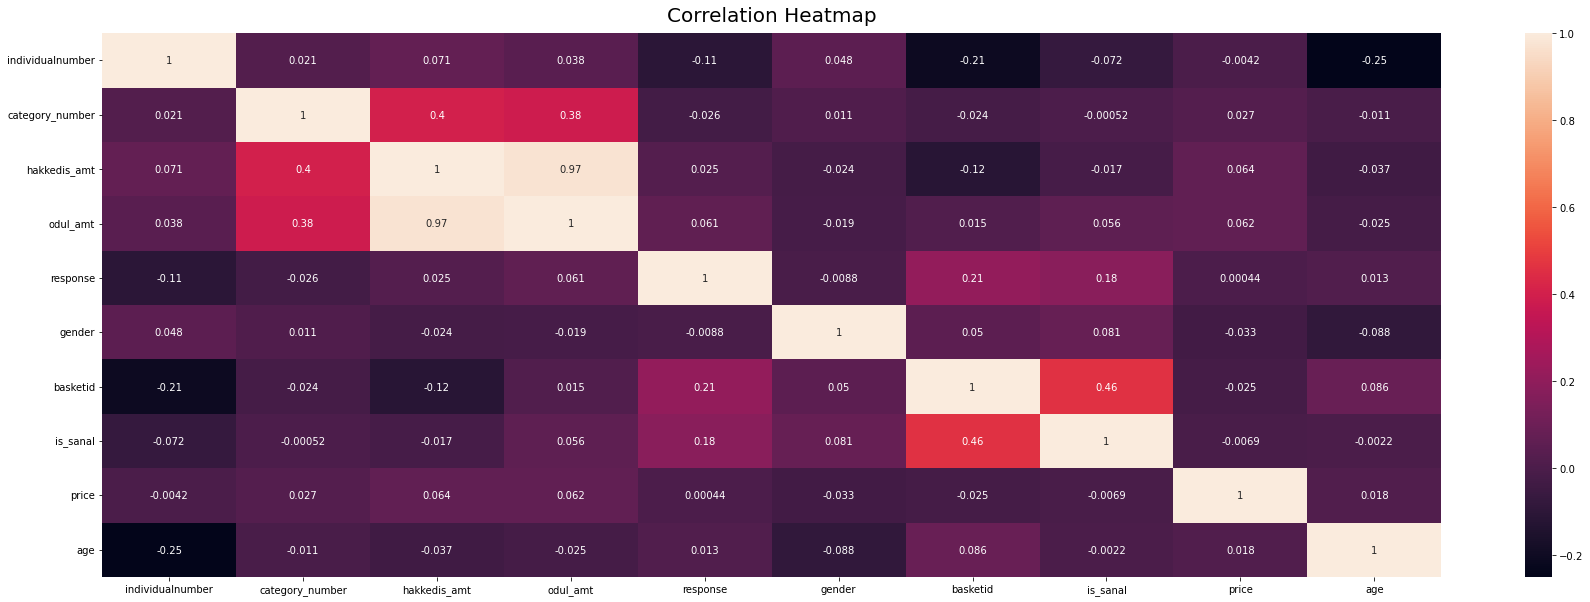

In [24]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In [25]:
df

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,basketid,is_sanal,price,age
0,94230288,9000,21,2,0,0,393,27,13,39
1,4684087,9000,17,1,0,0,138,0,35,71
2,92472145,9058,24,3,0,1,1709,158,10,40
3,88026681,9030,22,2,0,1,287,274,16,61
4,98127795,9001,38,3,0,0,24,0,5,38
...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27,2,0,1,893,27,5,25
13111,96841665,9004,65,6,0,0,271,0,18,51
13112,98445787,9044,33,3,0,1,142,0,11,47
13113,13781030,9004,66,6,0,0,53,7,9,41


In [26]:
test_df

,individualnumber,category_number,hakkedis_amt,odul_amt,gender,basketid,is_sanal,date_of_transaction,price,age
0,95812936,9029,38,3,0,28,0,28,34,27
1,23929570,9012,28,2,0,45,0,45,15,48
2,95948115,9019,21,2,0,22,0,22,20,55
3,100898513,9035,48,4,1,257,0,257,11,44
4,12769156,9015,26,3,1,1574,261,1574,8,52
...,...,...,...,...,...,...,...,...,...,...
13231,93418529,9049,32,3,0,248,0,248,9,43
13232,97397069,9018,20,2,0,26,0,26,6,29
13233,95212479,9046,85,8,0,15,0,15,22,60
13234,93406449,9032,39,3,0,68,0,68,15,56


In [27]:
df.drop("gender", axis=1, inplace=True)
df.drop("basketid", axis=1, inplace=True)
df.drop("individualnumber", axis=1, inplace=True)

In [28]:
test_df.drop("date_of_transaction", axis=1,inplace=True)
test_df.drop("gender", axis=1, inplace=True)
test_df.drop("basketid", axis=1, inplace=True)
test_df.drop("individualnumber", axis=1, inplace=True)

In [29]:
model_cols = list(df.columns)

In [30]:
X = df.drop("response", axis=1)
y = df["response"]

In [31]:
cat_features = list(range(0, X.shape[1]))
cat_features

[0, 1, 2, 3, 4, 5]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 209 rows.
return_df = df.loc[df['response'] == 1]
not_return_df = df.loc[df['response'] == 0][:209]

normal_distributed_df = pd.concat([return_df, not_return_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['response'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]

sns.countplot('response', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
X = new_df.drop('response', axis=1)
y = new_df['response']

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [104]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=7)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [72]:
from imblearn.over_sampling import SMOTE
OS = SMOTE(random_state=42)
X_train, y_train = OS.fit_resample(X_train, y_train)

In [105]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

model = xgb.XGBClassifier( 
        n_estimators=5000,
        max_depth=9, 
        learning_rate=0.01, 
        subsample=0.9,
        eval_metric='logloss',
        colsample_bytree=0.9,
        gamma = 0.2,
        alpha = 1,
        # USE CPU
        #nthread=4,
        #tree_method='hist' 
        # USE GPU
        tree_method='gpu_hist' 
    )
h = model.fit(X_train, y_train, 
        eval_set=[(X_val,y_val)],
        verbose=50, early_stopping_rounds=300)

XGBoost version: 1.7.2
[0]	validation_0-logloss:0.68707


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-logloss:0.47228
[100]	validation_0-logloss:0.35791
[150]	validation_0-logloss:0.28872
[200]	validation_0-logloss:0.24304
[250]	validation_0-logloss:0.20973
[300]	validation_0-logloss:0.18671
[350]	validation_0-logloss:0.16934
[400]	validation_0-logloss:0.15606
[450]	validation_0-logloss:0.14503
[500]	validation_0-logloss:0.13498
[550]	validation_0-logloss:0.12739
[600]	validation_0-logloss:0.12007
[650]	validation_0-logloss:0.11417
[700]	validation_0-logloss:0.10950
[750]	validation_0-logloss:0.10581
[800]	validation_0-logloss:0.10252
[850]	validation_0-logloss:0.10004
[900]	validation_0-logloss:0.09813
[950]	validation_0-logloss:0.09642
[1000]	validation_0-logloss:0.09534
[1050]	validation_0-logloss:0.09438
[1100]	validation_0-logloss:0.09392
[1150]	validation_0-logloss:0.09346
[1200]	validation_0-logloss:0.09323
[1250]	validation_0-logloss:0.09307
[1300]	validation_0-logloss:0.09292
[1350]	validation_0-logloss:0.09288
[1400]	validation_0-logloss:0.09285
[1450]	valid

In [ ]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

In [ ]:
saved_model = model.save_model('model')

In [ ]:
import statistics
pred = []
predict = model.predict_proba(test_df)[:,1]>0.4
probs = model.predict_proba(test_df)[:,1]

index=0
for t in predict:
    if t==True:
        if test_df["age"][index]<18:
            pred.append(0)
        else:
            pred.append(1)
    else:
        pred.append(0)
    index+=1

print(len(pred))
print(statistics.mean(probs))
print(np.max(probs))

In [ ]:
import statistics
statistics.mean(pred)

In [106]:
pred_proba = []
for pred in np.arange(0.00,0.51,0.01):
    train_pred = model.predict_proba(X_train)[:,1]>pred
    test_pred = model.predict_proba(X_val)[:,1]>pred
    print("Pred",pred,f1_score(y_train,train_pred),f1_score(y_val,test_pred))
    pred_proba.append(f1_score(y_val,test_pred))
print("Max test pred:",np.max(pred_proba))

Pred 0.0 0.6666666666666666 0.027819548872180452
Pred 0.01 0.8814558503139819 0.07044025157232704
Pred 0.02 0.9159268465909091 0.073943661971831
Pred 0.03 0.9356125872857531 0.08225108225108226
Pred 0.04 0.9481665288116902 0.0930232558139535
Pred 0.05 0.9566951038575667 0.10682492581602375
Pred 0.06 0.9631704243103206 0.10967741935483873
Pred 0.07 0.9681415098766011 0.10526315789473684
Pred 0.08 0.9722929035906136 0.10408921933085502
Pred 0.09 0.974957474957475 0.11244979919678715
Pred 0.1 0.9780073940657883 0.11764705882352942
Pred 0.11 0.9799582066869301 0.11872146118721459
Pred 0.12 0.9819635463760529 0.11707317073170731
Pred 0.13 0.9829927111619265 0.12060301507537688
Pred 0.14 0.9840240354809481 0.11640211640211641
Pred 0.15 0.9851045545688915 0.12154696132596685
Pred 0.16 0.9860931899641577 0.11627906976744186
Pred 0.17 0.9869421724781173 0.11764705882352941
Pred 0.18 0.9877926181243717 0.12048192771084336
Pred 0.19 0.9886445306885152 0.12422360248447205
Pred 0.2 0.98959282528415

In [ ]:
sub_df = pd.read_csv("sample_submission.csv")
sub_df["response"] = pred
sub_df.to_csv("submission.csv", index=False)